# Analisis grafico

Este script prueba algunos metodos de interpolacion usando como ejemplo datos de temperatura superficial de una campana oceanograpfica en la Patagonia. Usamos la funcion `interpolate_to_grid` de la libreria MetPy:

https://unidata.github.io/MetPy/latest/api/generated/metpy.interpolate.interpolate_to_grid.html#metpy.interpolate.interpolate_to_grid

En el link de arriba pueden (y deben :)) leer que argumentos u opciones le podemos pedir a la funcion para que interpole de la manera que queremos. Por ejemplo, como elegir el metodo (lineal, nearest neighbor, etc) y setear distintos parametros para ese metodo (como por ejemplo la cantidad de neighbors a incorporar).

Esta no es la unica forma de interpolar, ni la unica libreria que lo hace, hay muchas formas distintas de hacerlo dependiendo de que requerimientos tenemos. Los datos se encuentran en el archivo `Patagonia.xlsx`

### Cargamos librerias

Cuando hacemos un script en python hay que cargar manualmente las librerias que contienen las funciones que necesitamos usar.
`cartopy` es una libreria para realizar mapas, `matplotlib` para realizar graficos en general, `metpy` es la que contiene las funciones de interpolacion que vamos a usar, `numpy` contiene varias funciones numericas, como seno, coseno, etc y `pandas` nos sirve para abrir archivos .xlsx

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import metpy.interpolate as metint
import numpy as np
import pandas as pd

Definimos una funcion que grafica un mapa de la Patagonia usando la proyeccion Gauss Kruger (tambien llamada Transverse Mercator) que vamos a usar mas adelante:

In [2]:
def mapa():
    fig = plt.figure(figsize = (7, 12))
    axs = fig.add_subplot(projection = ccrs.TransverseMercator(central_longitude = -57, central_latitude = -45))
    axs.set_extent([-70, -50, -58, -30], crs = ccrs.PlateCarree())
    axs.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor = 'black', facecolor = 'linen'))
    return fig, axs

Vemos que pasa cuando la corremos:

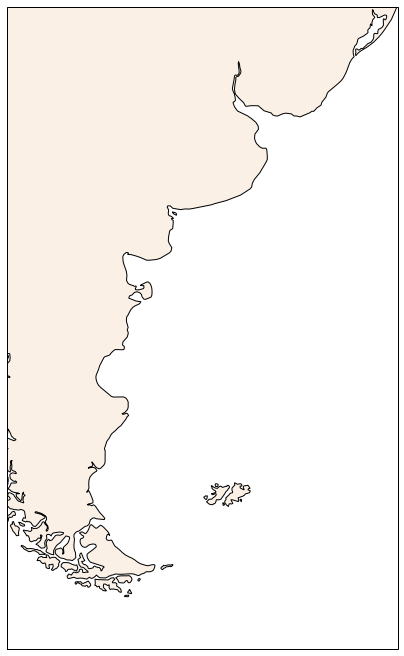

In [3]:
fig, ax = mapa()

Cargamos los datos y vemos que contienen:

In [4]:
data = pd.read_excel('Patagonia.xlsx', header = None).values

In [5]:
data

array([[-38.47, -57.67,  18.89,  33.31],
       [-38.49, -57.63,  18.9 ,  33.68],
       [-38.51, -57.6 ,  19.02,  33.67],
       ...,
       [-38.47, -57.99,  18.27,  33.8 ],
       [-38.43, -57.92,  18.26,  33.81],
       [-38.41, -57.89,  18.17,  33.81]])

En la primera columna tenemos latitud, en la segunda longitud, en la tercera temperatura y en la ultima salinidad.

Python indexa desde cero (la primera columna se la llama como 0). Asi que si por ejemplo quiero tomar solo las latitudes, usamos el comando `data[:, 0]`. El `:` significa que agarramos todas las filas de la columna `0`.

In [6]:
data[:, 0]

array([-38.47, -38.49, -38.51, ..., -38.47, -38.43, -38.41])

Podemos ver donde se tomaron los datos si graficamos longitud vs latitud:

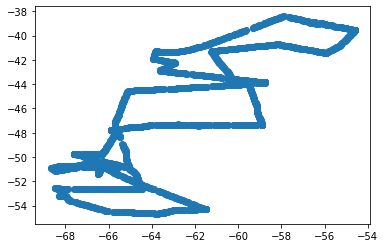

In [7]:
plt.scatter(data[:,1], data[:,0])

Pero una forma mas facil de interpretar estas posiciones es graficarlo sobre el mapa usando la funcion que definimos mas arriba.

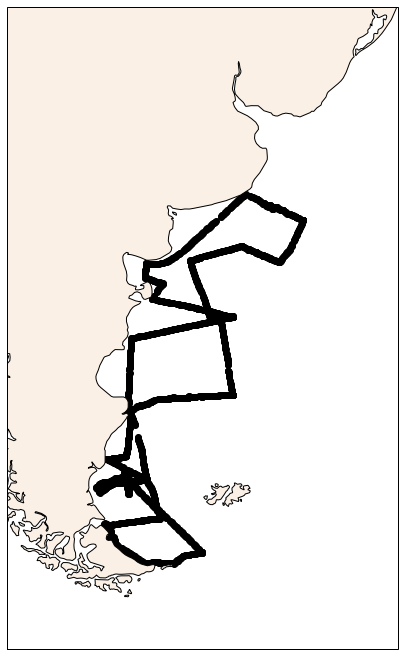

In [8]:
fig, axs = mapa()
axs.scatter(data[:,1], data[:,0], color = 'k', transform = ccrs.PlateCarree())

Ahora si, podemos probar como interpolar!

Vamos a usar distintos metodos usando el argumento `interp_type` y pidiendo que la resolucion de la grilla final (`hres`) sea de 1 grado longitud latitud. Pueden probar que pasa si pedimos una grilla de mayor/menor resolucion!

# Metodo 1: lineal

In [9]:
x_int, y_int, interpolacion_1 = metint.interpolate_to_grid(data[:,1], data[:,0], data[:,2], interp_type = 'linear', hres = 1)

Veamos que nos da como resultado! Los puntos negros nos marcan el muestreo original de datos y los rojos nos marcan la grilla a la cual estamos interpolando.

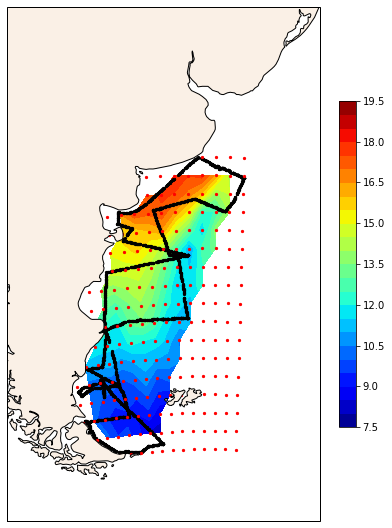

In [11]:
fig, axs = mapa()
c = axs.contourf(x_int, y_int, interpolacion_1, cmap = 'jet', levels = np.arange(7.5, 20, .5), transform = ccrs.PlateCarree())
axs.scatter(data[:,1], data[:,0], s = 5, color = 'k', transform = ccrs.PlateCarree())
axs.scatter(x_int, y_int, color = 'r', s = 5, transform = ccrs.PlateCarree())
fig.colorbar(c, shrink = .5, ax = axs)
plt.savefig('lineal.png')

# Metodo 2: natural neighbour

In [12]:
x_int, y_int, interpolacion_2 = metint.interpolate_to_grid(data[:,1], data[:,0], data[:,2], interp_type = 'natural_neighbor', hres = 1)

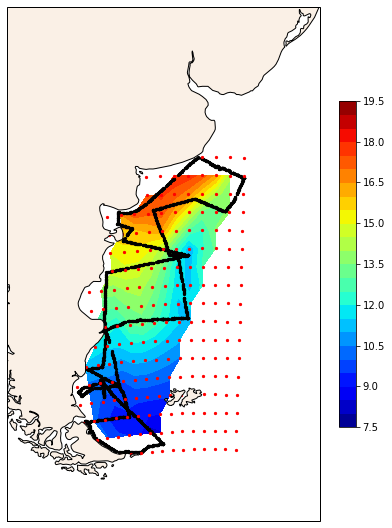

In [13]:
fig, axs = mapa()
c = axs.contourf(x_int, y_int, interpolacion_2, cmap = 'jet', levels = np.arange(7.5, 20, .5), transform = ccrs.PlateCarree())
axs.scatter(data[:,1], data[:,0], s = 5, color = 'k', transform = ccrs.PlateCarree())
axs.scatter(x_int, y_int, color = 'r', s = 5, transform = ccrs.PlateCarree())
fig.colorbar(c, shrink = .5, ax = axs)
plt.savefig('natneg.png')

# Metodo 3: nearest

In [14]:
x_int, y_int, interpolacion_3 = metint.interpolate_to_grid(data[:,1], data[:,0], data[:,2], interp_type = 'nearest', hres = 1)

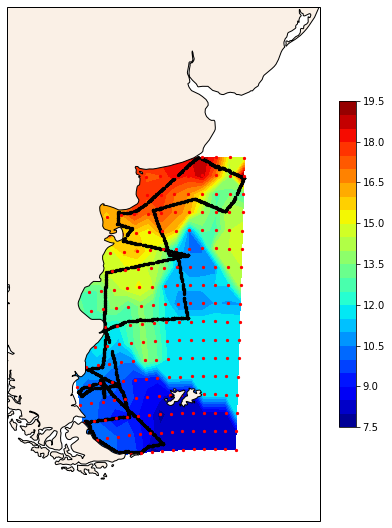

In [15]:
fig, axs = mapa()
c = axs.contourf(x_int, y_int, interpolacion_3, cmap = 'jet', levels = np.arange(7.5, 20, .5), transform = ccrs.PlateCarree())
axs.scatter(data[:,1], data[:,0], s = 5, color = 'k', transform = ccrs.PlateCarree())
axs.scatter(x_int, y_int, color = 'r', s = 5, transform = ccrs.PlateCarree())
fig.colorbar(c, shrink = .5, ax = axs)
plt.savefig('nearest.png')

# Metodo 4: cubic

In [16]:
x_int, y_int, interpolacion_4 = metint.interpolate_to_grid(data[:,1], data[:,0], data[:,2], interp_type = 'cubic', hres = 1)

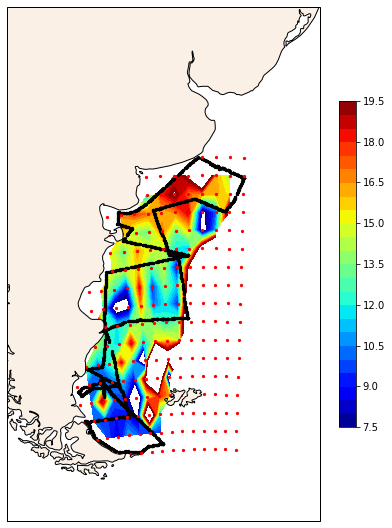

In [17]:
fig, axs = mapa()
c = axs.contourf(x_int, y_int, interpolacion_4, cmap = 'jet', levels = np.arange(7.5, 20, .5), transform = ccrs.PlateCarree())
axs.scatter(data[:,1], data[:,0], s = 5, color = 'k', transform = ccrs.PlateCarree())
axs.scatter(x_int, y_int, color = 'r', s = 5, transform = ccrs.PlateCarree())
fig.colorbar(c, shrink = .5, ax = axs)
plt.savefig('cubic.png')

Cual de estos metodos les parece el mas correcto?